In [1]:
"""
this script contains functions to visualize the different attributes
Author: Nathan Greffe
"""
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pickle
import pandas as pd
import numpy as np


In [2]:
results = pd.read_csv('architectures.csv')
results['time'] = results['time'] * 1000
results['error'] = 100*(1.0 - results[['acc1', 'acc2', 'acc3']].mean(axis=1))
results['error_std'] = 100*results[['acc1', 'acc2', 'acc3']].std(axis=1)
results.head()

,file_name,arch,depth,width,other,acc1,acc2,acc3,time,error,error_std
0,mobilenetv1_d15_cosine,mobilenetv1,15,32,NaN,0.9182,0.9191,0.9196,22.6,8.103333,0.070946
1,mobilenetv2_d12_er4_cosine_1,mobilenetv2,12,32,4.0,0.9286,0.9279,0.9329,76.1,7.020000,0.270740
2,squeezenext_d9_cosine_1,squeezenext,9,32,NaN,0.9102,NaN,NaN,26.5,8.980000,NaN
3,wrn_multistep,wrn,40,32,NaN,0.9479,NaN,NaN,345.7,5.210000,NaN
4,shufflenetv2_d12_w64_cosine,shufflenetv2,12,64,NaN,0.9287,NaN,NaN,44.1,7.130000,NaN


In [3]:
results_val = pd.read_csv('architectures_val.csv')
results_val['time'] = results_val['time'] * 1000
results_val['error'] = 100*(1.0 - results_val['acc'])
results_val.head()

,file_name,arch,depth,width,other,acc,time,error
0,effnet_d12_e2_cosine,effnet,12,2,NaN,0.8902,10.2,10.98
1,effnet_d12_e3_cosine,effnet,12,32,3.0,0.9038,15.3,9.62
2,effnet_d12_e4_cosine,effnet,12,32,4.0,0.9102,21.5,8.98
3,effnet_d15_e2_cosine,effnet,15,2,NaN,0.8888,10.1,11.12
4,effnet_d15_e3_cosine,effnet,15,32,3.0,0.8964,15.4,10.36


In [4]:
pruning_wrn_res = pd.read_csv('../NetAdapt/pruning_methods.csv')
pruning_wrn_res['table_time'] = pruning_wrn_res['table_time'] * 1000
pruning_wrn_res['measured_time'] = pruning_wrn_res['measured_time'] * 1000
pruning_wrn_res = pruning_wrn_res[np.logical_or(
    pruning_wrn_res.method == 'unpruned',
    np.logical_and(pruning_wrn_res.method == 'fisher_table', 
    pruning_wrn_res.group.isnull()))]  # we take the unpruned + fisher table WRNs
pruning_wrn_res.head()

,file_name,no_fine_tune,fine_tune,retrain_scratch,table_time,measured_time,method,group
39,res-40-2-table_fisher-pf=0.8-150ch,5.28,NaN,4.97,284.2,285.6,fisher_table,NaN
40,res-40-2-table_fisher-pf=0.8-300ch,5.39,NaN,5.25,243.1,240.4,fisher_table,NaN
41,res-40-2-table_fisher-pf=0.8-450ch,5.29,NaN,5.36,220.5,222.0,fisher_table,NaN
42,res-40-2-table_fisher-pf=0.8-600ch,7.52,NaN,5.71,168.6,166.8,fisher_table,NaN
43,res-40-2-table_fisher-pf=0.8-750ch,15.80,NaN,5.92,119.3,117.9,fisher_table,NaN


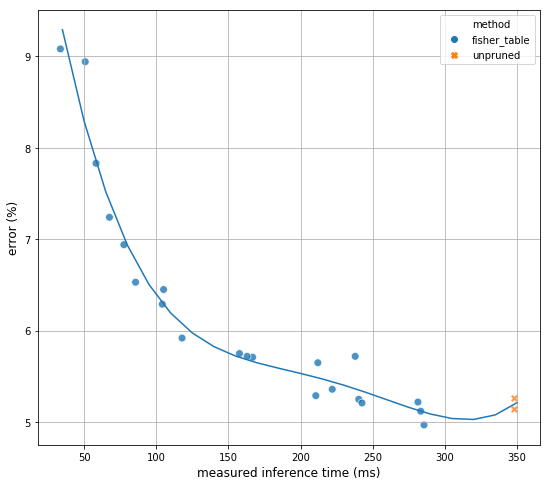

In [5]:
# fits a polynom
polynom = np.poly1d(np.polyfit(pruning_wrn_res.measured_time, 
                               pruning_wrn_res.retrain_scratch, 4))

fig, ax = plt.subplots(1, figsize=(9, 8))
sns.scatterplot(x="measured_time", y="retrain_scratch", data=pruning_wrn_res, hue='method', 
                style='method', legend='brief', ax=ax, s=60, alpha=0.8)
plt.plot(np.arange(35,351,15), polynom(np.arange(35,351,15)))
ax.set_xlabel('measured inference time (ms)', fontsize=12)
ax.set_ylabel('error (%)', fontsize=12)
ax.grid(True)

,file_name,arch,depth,width,other,acc1,acc2,acc3,time,error,error_std
0,mobilenetv1_d15_cosine,mobilenetv1,15,32,NaN,0.9182,0.9191,0.9196,22.6,8.103333,0.070946
1,mobilenetv2_d12_er4_cosine_1,mobilenetv2,12,32,4.0,0.9286,0.9279,0.9329,76.1,7.020000,0.270740
2,squeezenext_d9_cosine_1,squeezenext,9,32,NaN,0.9102,NaN,NaN,26.5,8.980000,NaN
3,wrn_multistep,wrn,40,32,NaN,0.9479,NaN,NaN,345.7,5.210000,NaN
4,shufflenetv2_d12_w64_cosine,shufflenetv2,12,64,NaN,0.9287,NaN,NaN,44.1,7.130000,NaN


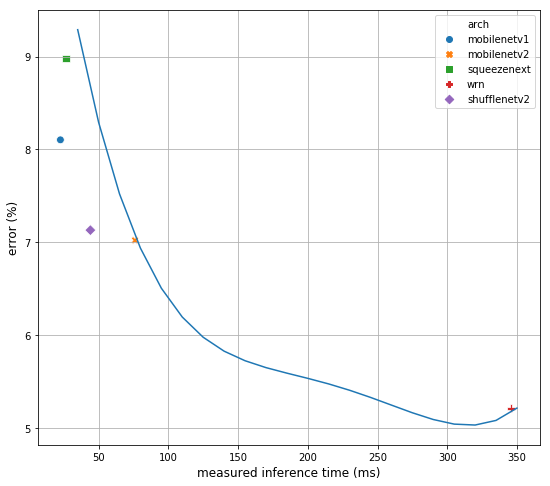

In [6]:
fig, ax = plt.subplots(1, figsize=(9, 8))
sns.scatterplot(x="time", y="error", data=results, hue='arch', 
                style='arch', legend='brief', ax=ax, s=60)
plt.plot(np.arange(35,351,15), polynom(np.arange(35,351,15)))
ax.set_xlabel('measured inference time (ms)', fontsize=12)
ax.set_ylabel('error (%)', fontsize=12)
ax.grid(True)
results.head()

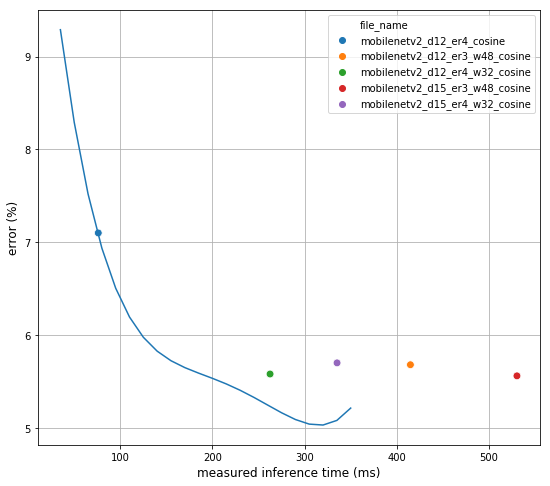

In [8]:
fig, ax = plt.subplots(1, figsize=(9, 8))
results_val_to_plot = results_val[results_val.arch == "mobilenetv2"]
sns.scatterplot(x="time", y="error", data=results_val_to_plot, hue='file_name', 
                legend='brief', ax=ax, s=60)
plt.plot(np.arange(35,351,15), polynom(np.arange(35,351,15)))
ax.set_xlabel('measured inference time (ms)', fontsize=12)
ax.set_ylabel('error (%)', fontsize=12)
ax.grid(True)